In [1]:
#Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

In [2]:
#Preprocessing and Creating organized_data - normalized_data

In [3]:
data=pd.read_csv('diabetes_data.csv',sep=';')
data['gender'] = (data['gender'] == 'Male').astype(int)
organized_data=data
normalizer=MinMaxScaler()
normalized_data=normalizer.fit_transform(organized_data)
normalized_data=pd.DataFrame(normalized_data, columns = organized_data.columns)
y=organized_data['class']
organized_data=organized_data.drop(columns='class')
normalized_data=normalized_data.drop(columns='class')

In [4]:
#Clustering and output values are the rand_score metrics

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(organized_data)
COD=kmeans.predict(organized_data)
print("Rand score of the organized data = {}".format(rand_score(COD,y)))
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(normalized_data)
CND=kmeans.predict(normalized_data)
print("Rand score of the organized data = {}".format((rand_score(CND,y))))

Rand score of the organized data = 0.49963687564843634
Rand score of the organized data = 0.6361049355269008


In [ ]:
### Got the scatter plots of clustarization below.

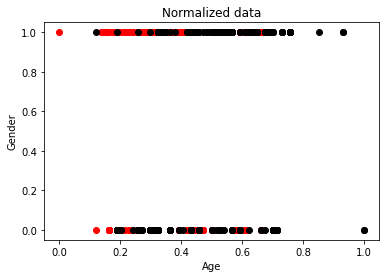

None


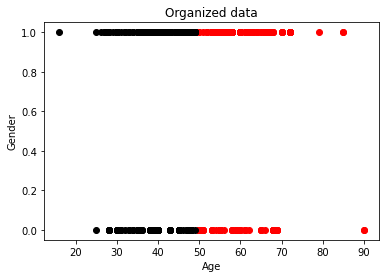

None


In [6]:
clustered_organized=organized_data.copy()
clustered_organized['cluster']=COD
normalized_organized=normalized_data.copy()
normalized_organized['cluster']=CND
filtered_label0=normalized_organized[normalized_organized['cluster']==0]
filtered_label1=normalized_organized[normalized_organized['cluster']==1]
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Normalized data")
print(plt.show())
filtered_label0=clustered_organized[clustered_organized['cluster']==0]
filtered_label1=clustered_organized[clustered_organized['cluster']==1]
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Organized data")
print(plt.show())


In [7]:
### Created Gaussian Naive Bayes object

In [8]:
gnb=GaussianNB()

In [9]:
#Define the test train split function with kfold
#Classification with naive bayes is implemented in this function too.

In [22]:
def kfold_test(k):
    acc_score_organized=0
    acc_score_normalized=0
    confusion_organized=np.array([[0,0],[0,0]])
    confusion_normalized=np.array([[0,0],[0,0]])
    kf=KFold(n_splits=k, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(organized_data):
        X_train,X_test=organized_data.iloc[train_index], organized_data.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        confusion_organized += confusion_matrix(y_test, y_pred)
        acc_score_organized+=accuracy_score(y_test, y_pred)
        X_train,X_test=normalized_data.iloc[train_index], normalized_data.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        confusion_normalized += confusion_matrix(y_test, y_pred)
        acc_score_normalized += accuracy_score(y_test, y_pred)
    print("Mean accuracy of the organized data with {} folds = {}".format(k,acc_score_organized/k))
    print("Mean accuracy of the normalized data with {} folds = {}".format(k,acc_score_normalized/k))
    print("Sum confusion_matrix of the organized data with {} folds =  {}".format(k,confusion_organized))
    print("Sum confusion_matrix of the normalized data with {} folds = {}".format(k,confusion_normalized))
    

In [24]:
kfold_test(7)

Mean accuracy of the organized data with 7 folds = 0.8826769626769628
Mean accuracy of the normalized data with 7 folds = 0.8826769626769628
Sum confusion_matrix of the organized data with 7 folds =  [[168  32]
 [ 29 291]]
Sum confusion_matrix of the normalized data with 7 folds = [[168  32]
 [ 29 291]]
